# Importing required modules

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

You can see what's in a module using `dir` (I will not actually run it because it prints out a lot)

In [5]:
# dir(nx)

NetworkX has a lot of stuff in it. As such, the following is a #badidea, for any module.

In [6]:
# from networkx import *

# Basic data types in NetworkX

NetworkX provides the following classes that represent network-related data,
as well as network analysis algorithms that operate on these objects:

**Graph**       - Undirected graph with self loops

**DiGraph**      - Directed graph with self loops

**MultiGraph**   - Undirected Graph with self loops and multiple edges

**MultiDiGraph** - Directed Graph with self loops and multiple edges

#Getting started
Create an empty, undirected network

In [3]:
G = nx.Graph()

In [4]:
nx.__version__

'3.4.2'

# Nodes
Nodes can be almost anything, including numbers, strings, GPS coordinates, you name it.

Nodes can be added one at a time:

In [5]:
G.add_node(0)
G.add_node("Walter")

# tuple object representing, say, longitude and latitude
pos = (51.0447, 114.0719) 
G.add_node(pos)

...or many at once from a python container

In [8]:
# [1,2,3] is a list containing 1, 2, and 3
G.add_nodes_from([1, 2, 3])

# Node attributes
Nodes can have arbitrary attributes associated with them, contained in a string-index dictionary

Adding attributes at the time of node creation using keyword arguments:

In [9]:
G.add_node("Firefly", eye_color='amber', weight=12)

You can also add attributes to an already existing node

In [12]:
G.add_node("Walter")

# add an attribute "fur colour" with value brown/white tabby to Walter
G.nodes["Walter"]["fur colour"] = 'brown/white tabby'

print(G.nodes["Walter"]) # dictionary keyed by node name


{'fur colour': 'brown/white tabby'}


G.nodes[n] gives a dictionary containing all the attribute:value pairs associated with node n

In [13]:
print("Firefly's eyes are ", G.nodes["Firefly"]["eye_color"], " and she weighs ", G.nodes['Firefly']['weight'], " pounds")
print("Walter has ", G.nodes["Walter"]["fur colour"], " coloured fur.")

Firefly's eyes are  amber  and she weighs  12  pounds
Walter has  brown/white tabby  coloured fur.


# Edges

An edge between node1 and node2 is represented by a tuple (node1, node2)  
They can be added one at a time:

In [14]:
# add edge between node 0 and node 1
G.add_edge(0, 1)

Or many at once from a container

In [15]:
edge_list = [ (2, 1), ("Firefly", "Walter"), (3, 4) ]
G.add_edges_from(edge_list)

**Note:** Nodes will be automatically created if they don't already exist.

# Edge attributes
Like nodes, edges can also have arbitrary attributes. An important and special one (for many algorithms) is "weight"  

The syntax for adding/accessing edge attributes is the similar to that for nodes:

In [16]:
G.add_edge("Walter", "Harvey", weight=10)

G.add_edge("Calgary", "Edmonton")
G.edges["Calgary", "Edmonton"]['distance'] = 300

`G.edges[node1, node2]` is a dictionary containing all attribute:value pairs associated with the edge from node1 to node2

# Basic operations

### Size of the network

In [17]:
# number of nodes
print(G.number_of_nodes())

# more pythonic way
print(len(G))

# number of edges
print(G.number_of_edges())

# better
print(G.size())

# how to do string formatting
print("G has {0} nodes and {1} edges.".format(len(G), G.size()))

11
11
6
6
G has 11 nodes and 6 edges.


###Testing to see whether nodes or edges exist

In [18]:
G.has_node("Harvey")

True

More pythonic way

In [19]:
"Walter" in G

True

For edges, you must use has_edge (no syntax like `edge in G`)

In [21]:
print(G.has_edge(4, 3))
print(G.has_edge("Firefly", 0))

True
False


### Finding neighbors of a node

In [22]:
list(G.neighbors(1))

[0, 2]

* In `DiGraph` objects, `G.neighbors(node)` gives the successors of `node`, as does `G.successors(node)`  
* Predecessors of `node` can be obtained with `G.predecessors(node)`

### Iterating over nodes and edges
Nodes and edges can be iterated over with `G.nodes()` and `G.edges()` respectively  

In [23]:
for node, data in G.nodes(data=True): # data=True includes node attributes as dictionaries
    print("Node {0}\t\t\t: {1}".format(node, data))

Node 0			: {}
Node Walter			: {'fur colour': 'brown/white tabby'}
Node (51.0447, 114.0719)			: {}
Node 1			: {}
Node 2			: {}
Node 3			: {}
Node Firefly			: {'eye_color': 'amber', 'weight': 12}
Node 4			: {}
Node Harvey			: {}
Node Calgary			: {}
Node Edmonton			: {}


In [24]:
for n1, n2, data in G.edges(data=True):
    print("{0} <----> {1}: {2}".format(n1, n2, data))

0 <----> 1: {}
Walter <----> Firefly: {}
Walter <----> Harvey: {'weight': 10}
1 <----> 2: {}
3 <----> 4: {}
Calgary <----> Edmonton: {'distance': 300}


### Calculating degrees

In [25]:
# one node
print(G.degree("Walter")) # returns an integer

# all nodes (returns a DegreeView object with node, degree pairs)
print(G.degree())

# just the degree sequence
print([G.degree(node) for node in G])

2
[(0, 1), ('Walter', 2), ((51.0447, 114.0719), 0), (1, 2), (2, 1), (3, 1), ('Firefly', 1), (4, 1), ('Harvey', 1), ('Calgary', 1), ('Edmonton', 1)]
[1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1]


As you know, in directed graphs (of class `DiGraph`) there are two types of degree. Things work just as you expect
* `G.in_degree(node) `
* `G.out_degree(node) # same as G.degree()`


# Other operations

* ***`subgraph(G, nbunch)` or `G.subgraph(nbunch)`***       
subgraph of G induced by nodes in nbunch    

* ***`reverse(G)`***       
DiGraph with edges reversed 

* ***`union(G1, G2)`***      
graph union    

* ***`disjoint_union(G1, G2)`***     
same, but treats nodes of G1, G2 as different 

* ***`intersection(G1, G2)`***      
graph with only the edges in common between G1, G2

* ***`difference(G1, G2)`***      
graph with only the edges G1 that aren't in G2

* ***`copy(G)` or `G.copy()`***     
copy of G

* ***`complement(G)` or `G.complement()`***     
the complement graph of G 

* ***`convert_to_undirected(G)` or `G.to_undirected()`***     
undirected version of G (a Graph or MultiGraph)  

* ***`convert_to_directed(G)` or `G.to_directed()`***      
directed version of G (a DiGraph or MultiDiGraph)

* ***`adjacency_matrix(G)`***      
adjacency matrix A of G (in sparse matrix format; to get full matrix, use A.toarray() )

# Graph I/O

Usually you will not be building a network from scratch one node/link at a time. Instead, you will
want to read it in from an appropriate data file. NetworkX can understand the following common graph
formats:

* edge lists
* adjacency lists
* GML
* GEXF
* Python 'pickle'
* GraphML
* Pajek
* LEDA
* YAML

# Getting started: reading in an edge list
Put the file `test.txt` from .zip data file into your working directory for IPython  
If you don't know the present working directory, you can get it by typing  

`%pwd`

in any cell

Read in the file with the following options
* lines starting with `#` are treated as comments and ignored  
* use a `Graph` object to hold the data (i.e., network is undirected)  
* data are separated by whitespace (' ')
* nodes should be treated as integers (`int`)
* encoding of the text file containing the edge list is utf-8

In [27]:
# read in an edge list from the file 'test.txt'
G = nx.read_edgelist('./test.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Allowed formats
* Node pairs with no data  
`1 2`
* Node pairs with python dictionary  
`1 2 {weight:7, color:"green"}`

# Basic analysis
A large number of basic analyses can be done in one line using NetworkX + numpy or builtin python functions like `min`, `max`, etc.

In [28]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [29]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  443
Number of edges:  540

Average degree:  2.4379232505643342
Average degree (alternate calculation) 2.4379232505643342

Minimum degree:  1
Maximum degree:  8


# Drawing the network
* NetworkX can draw networks using a large number of layout algorithms  
* The results are not as pretty as Gephi, but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

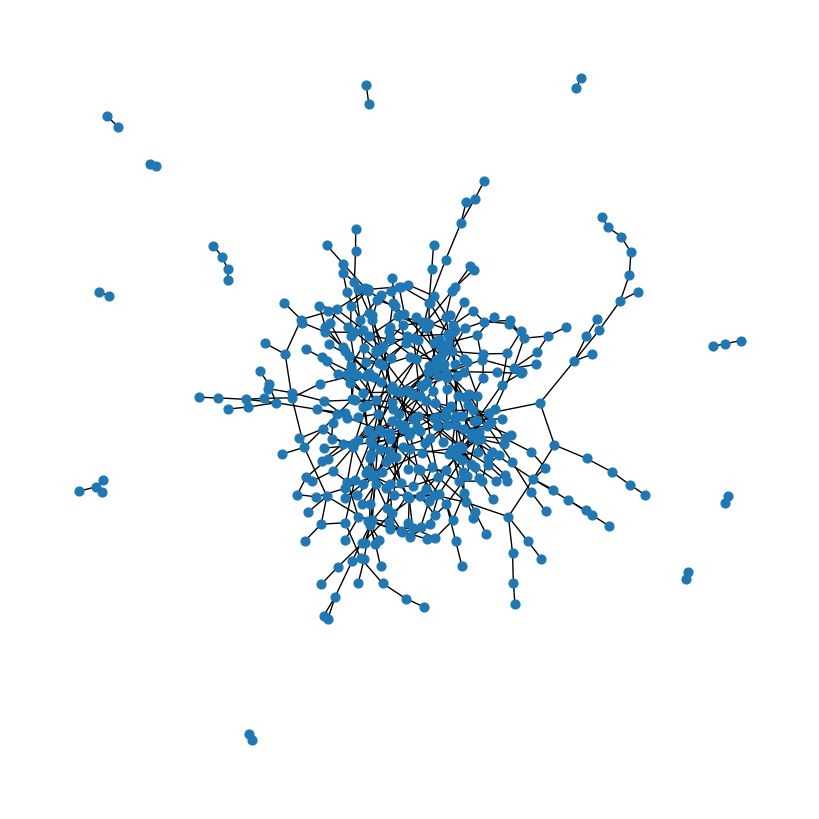

In [33]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=40)

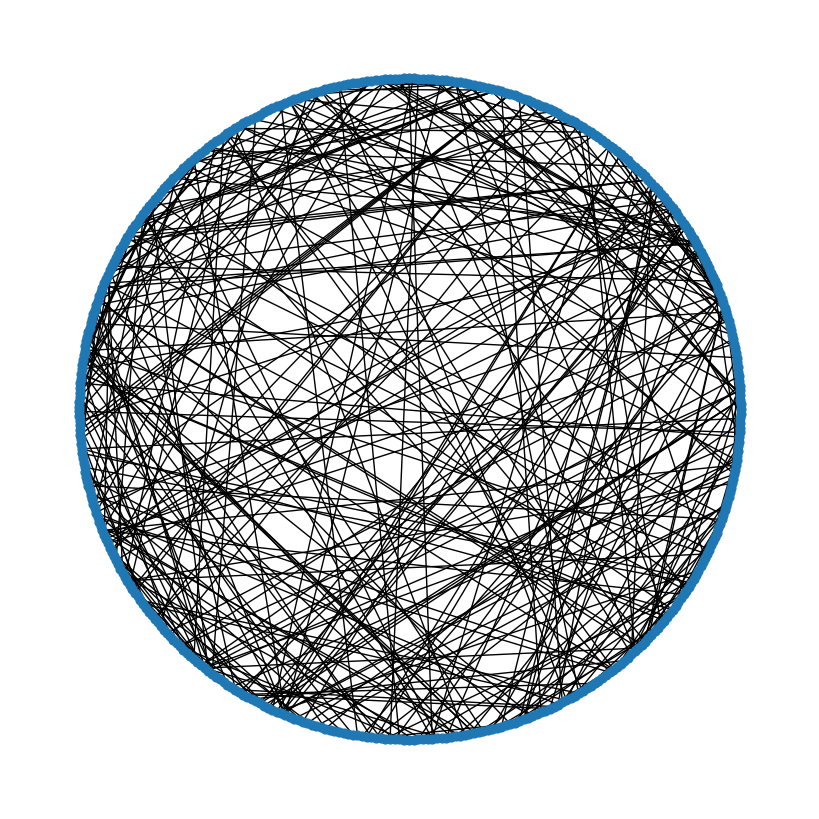

In [35]:
# using the fcircular layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=40)

# Plotting the degree distribution

Let's plot it in log scale first

`numpy` can be used to get logarithmically-spaced bins between the minimum and maximum degree

In [36]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

now plot it

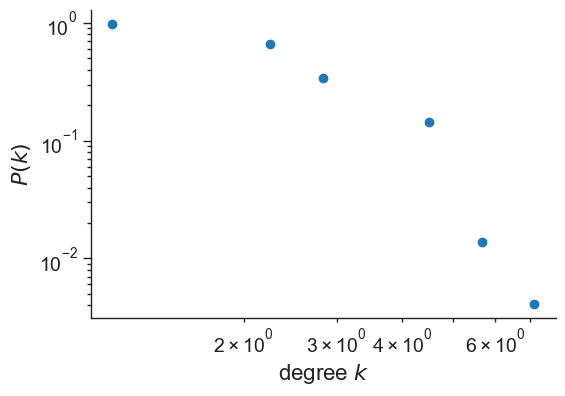

In [39]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

This is clearly not a network with anything like a heavy-tailed or power law degree distribution.
Let's also plot it in linear-linear scale.

The `linspace` command in `numpy` is used to get linearly-spaced numbers between two extremes

In [40]:
# Get 10 linearly spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

Now plot it

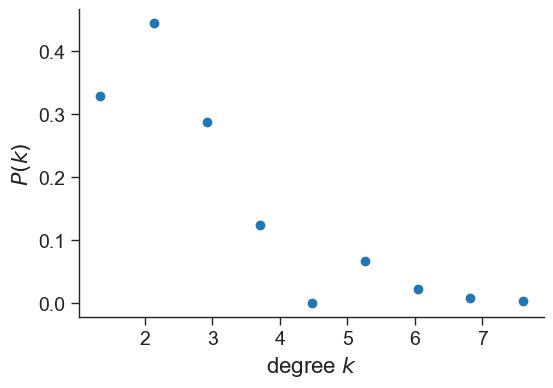

In [ ]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

# Exercise 3.1: Degrees and layouts
Now we will take a look at the networks in `example_1.txt` and `example_2.txt`. Read in the edge
list files and do the following:
* Do the basic measurements shown above. What can you suspect about the degree distribution of the network just based on the average and extremes in degree?
* Plot the degree distribution in log-log scale. Also plot it in linear scale. Comment on how this fits with the previous point.
* Draw the network using the two layout algorithms shown above. How does the the network's appearance echo your other findings?

In [1]:
# importing required modules
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
# read in the edge list "example_1.txt"
# undirected graph

example_1 = nx.read_edgelist('./example_1.txt', comments='#',
                                create_using=nx.Graph(), 
                                delimiter=' ',
                                nodetype=int,
                                encoding='utf-8')

In [3]:
# Perform basic measurements

print("Number of nodes: ", len(example_1))
print("Number of edges: ", example_1.size())
print("Average degree: ", 2*example_1.size()/len(example_1))


Number of nodes:  1000
Number of edges:  2991
Average degree:  5.982


There are 1000 nodes and 2991 edges, meaning the graph is definitely sparse.

The max number of edges = (1000 * 999) / 2 = 499500 and 2991 << 499500

In [4]:
degrees = [example_1.degree(node) for node in example_1] # an array of degrees for every node in order

min_degree = min(degrees)
max_degree = max(degrees)

print("Minimum degree: ", min_degree)
print("Maximum degree: ", max_degree)


Minimum degree:  3
Maximum degree:  98


The average degree is quite low despite their being high variance between min_degree and max_degree. 

This suggest a power-law distribution where the vast majority of nodes will have very low degrees and this drags the average down significantly.

Yet, there are a few very highly connected "hub" nodes (closer to the degree = 98 (max)) that dominate the connectivity of the network.

This dataset closely resembles real social media, where a small number of accounts have millions of followers, but the vast majority have like below 1000.


In [5]:
# Plot the degree distribution in log-log scale

# Get 10 logarithmically spaced bins between max and min degree
bin_edges = np.logspace(np.log10(min_degree), np.log10(max_degree), num=10)

# separate the data into these bines

density, _ = np.histogram(degrees, bins=bin_edges, density=True) # density=True normalizes the histogram

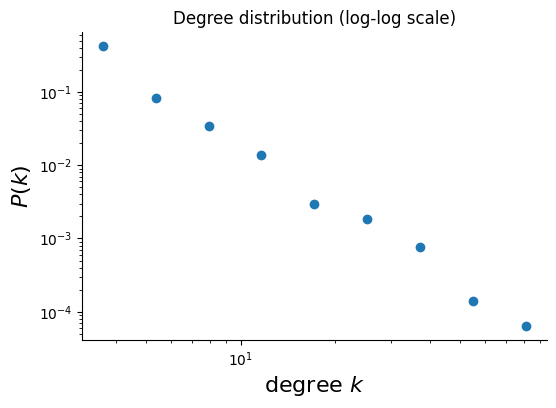

In [6]:
# plot

fig = plt.figure(figsize=(6,4))

# Assign a midpoint (10) (in log space) to each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2) 

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top bounadires for aesthetics
ax = plt.gca() # this just gets the current axis

# ax.spines is a dictionary
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# add title
plt.title("Degree distribution (log-log scale)")

# plot
plt.show()

In this code, the x-axis represents the degree (k), and the y-axis is the probability that a random node will get the degree k. 

Since this is a log-log plot, we can be fairly certain that this is a power-law distribution as we see a straight line. 

In [7]:
# 10 linearly spaced bins
bin_edges = np.linspace(min_degree, max_degree, num=10)

# separate the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

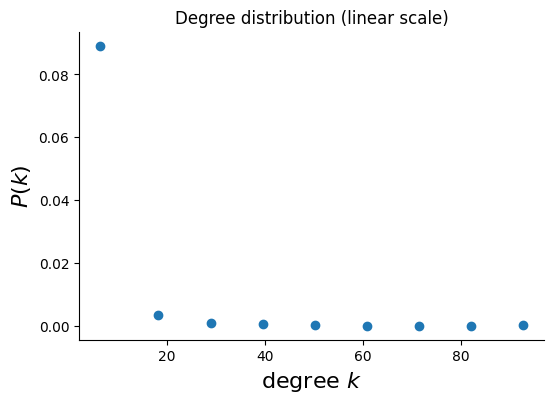

In [10]:
fig = plt.figure(figsize=(6,4))

long_be = np.log10(bin_edges)
x = 10**((long_be[1:] + long_be[:-1])/2) # assign x to be the midpoint of each bin

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries

ax = plt.gca() 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.title("Degree distribution (linear scale)")

plt.show()

This is consistent with the observation of a power-law distribution. In linear time scale, a node has a much higher probability of getting a small degree than even a marginally larger one. (for example, compare degree = 5 with degree = 15)

Layout Diagrams

In these we expect that nodes with very high degrees will be centrally located and will be visually prominent.

However, the vast majority of nodes with low degrees will be pushed towards the periphery of the visualization and form kind of like a cloud around the few central hubs.

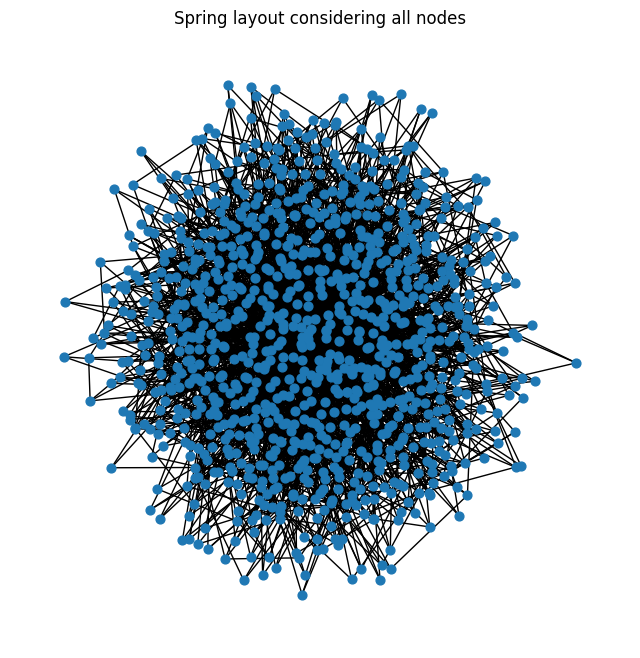

In [8]:
# Using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
# put a title
plt.title("Spring layout considering all nodes")
nx.draw_spring(example_1, node_size=40)

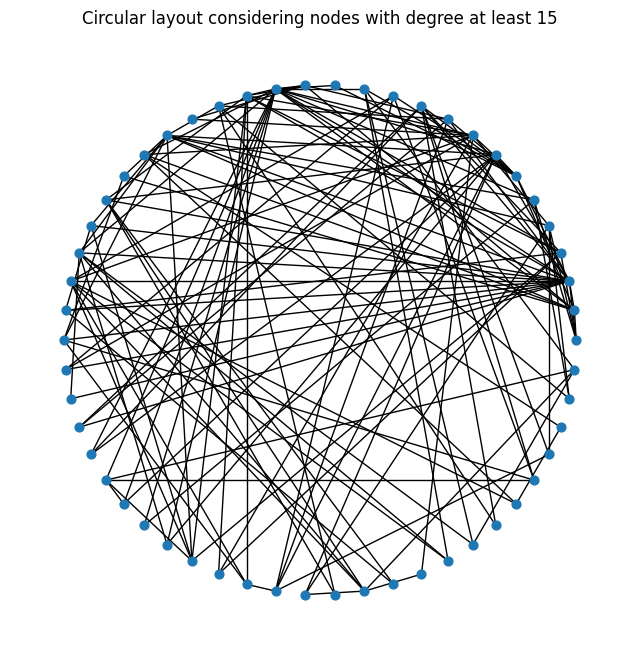

In [9]:
# fcircular layout algorithm

fig = plt.figure(figsize=(8,8))
# clean up to only show nodes with degree k > 15
example_1_filtered = example_1.copy()
example_1_filtered.remove_nodes_from([node for node in example_1 if example_1.degree(node) < 15])

plt.title("Circular layout considering nodes with degree at least 15")

nx.draw_circular(example_1_filtered, node_size=40)

Here, we can definitely see central hubs in the Force-Directed Layout. There is a potential for some loss of information because of the hairball of edges in the centre. The clusters of nodes on the outside are far more loosely connected.

The fcircular layout diagram was a little bit messy. I cleaned it up by removing all nodes with degree < 15. Consider that there are almost 3000 nodes, and this fcircular layout diagram says a lot. There are a countable (you could count by hand) number of nodes with degree >= 15 among thousands of possible connections. So, this is certaintly a power law distribution that is sparse.

# Generating an ER network
* This model ($G(n,p)$) is parameterized by number of nodes $n$ and connection probability $p$
* We will implement this as a function that takes $n$, $p$ as arguments

In [47]:
def erdos_renyi(n, p):
    # Create an empty graph
    G = nx.Graph()
    
    # add nodes (integers between zero and n-1)
    G.add_nodes_from(range(0, n))
    
    # for all possible pairs of nodes, add a link with probability p
    for node1 in range(0, n):
        for node2 in range(node1 + 1, n):
            if np.random.uniform() < p:
                G.add_edge(node1, node2)
    return G

In [48]:
# More pythonic way
import itertools as it

def erdos_renyi(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(edge for edge in it.combinations(nodes, 2) if np.random.uniform() < p)
    return G

### Let's test to see if it works

In [49]:
G = erdos_renyi(10**3, 1e-2)

print("G has {0} nodes.".format(len(G)))
print("G has {0} edges.".format(G.size()))
degrees = [G.degree(node) for node in G]
print("Avg. degree of G is {0}.".format(np.mean(degrees)))

G has 1000 nodes.
G has 4884 edges.
Avg. degree of G is 9.768.


Do these statistics make sense for the $n$ and $p$ we provided?

# Exercise 3.2: Network regimes
* Let's use what we've learned today to reproduce some of the results on pg. 16 of Chapter 3: Random Networks
* Recall there are four regimes: Subcritical, Critical, Supercritical, and Connected
* ***You can use the networkx function `fast_gnp_random_graph(n, p)` to generate your networks***

## Subcritical, Critical, and Supercritical regimes
You will consider networks of average degree $k = 0.5, k=1$, and $k=2$ respectively. Choose connection probabilities accordingly. For each value of $k$, do the following:
* Generate one random network each of sizes $N=10^2, 10^3, 10^4, 10^5$, and $10^6$ using the average degree
* For each network, get the connected components (see below). 
* Following the procedure for plotting distributions above, modify the code to plot the distribution of the sizes of the connected components in log-log scale. Plot this for all the networks in the same figure using different colors. 
* Calculate the size of the largest component for each of the 5 networks. Are they giant components? Write new code to plot the largest component size as a function of N in semi-log scale (hint: use `plt.semilogx`)
* Compare the above two results with your expectation from the book

In [10]:
# k = 0.5

# Generate networks with fast_gnp_random_graph(n, p) - because this is sparse
# n is the number of nodes
# p is the probability of an edge between any two nodes

# for every network, p = k / (N - 1)

G1 = nx.fast_gnp_random_graph(10**2, 0.5/(10**2 - 1))
G2 = nx.fast_gnp_random_graph(10**3, 0.5/(10**3 - 1))
G3 = nx.fast_gnp_random_graph(10**4, 0.5/(10**4 - 1))
G4 = nx.fast_gnp_random_graph(10**5, 0.5/(10**5 - 1))
G5 = nx.fast_gnp_random_graph(10**6, 0.5/(10**6 - 1))


In [15]:
# Get the connected components of each network
cc1 = list(nx.connected_components(G1))
cc2 = list(nx.connected_components(G2))
cc3 = list(nx.connected_components(G3))
cc4 = list(nx.connected_components(G4))
cc5 = list(nx.connected_components(G5))

print("G1 has {0} connected components.".format(len(cc1)))
print("G2 has {0} connected components.".format(len(cc2)))
print("G3 has {0} connected components.".format(len(cc3)))
print("G4 has {0} connected components.".format(len(cc4)))
print("G5 has {0} connected components.".format(len(cc5)))


G1 has 72 connected components.
G2 has 745 connected components.
G3 has 7460 connected components.
G4 has 74865 connected components.
G5 has 750110 connected components.


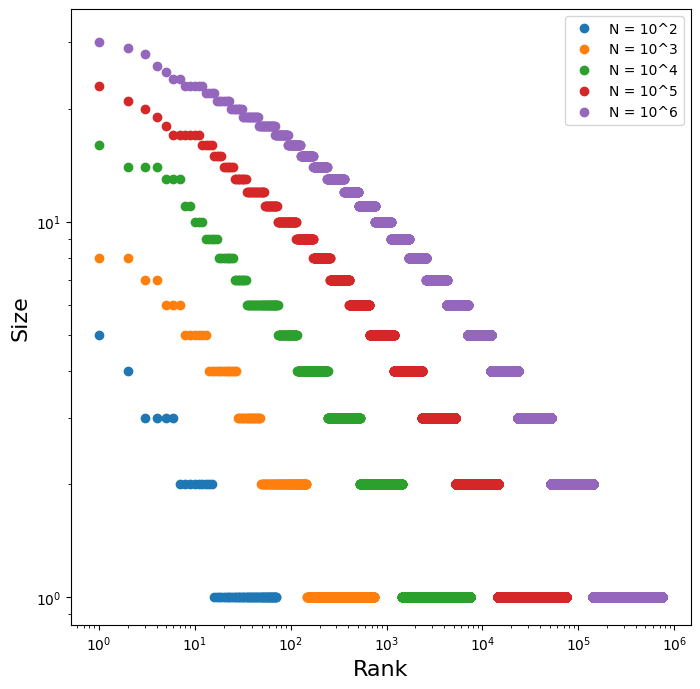

In [ ]:
# Plot the distribution of the sizes in log-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the connected components
sizes1 = [len(cc) for cc in cc1]
sizes2 = [len(cc) for cc in cc2]
sizes3 = [len(cc) for cc in cc3]
sizes4 = [len(cc) for cc in cc4]
sizes5 = [len(cc) for cc in cc5]

# each of these should get a different colour
plt.loglog(sorted(sizes1, reverse=True), 'o', label='N = 10^2')
plt.loglog(sorted(sizes2, reverse=True), 'o', label='N = 10^3')
plt.loglog(sorted(sizes3, reverse=True), 'o', label='N = 10^4')
plt.loglog(sorted(sizes4, reverse=True), 'o', label='N = 10^5')
plt.loglog(sorted(sizes5, reverse=True), 'o', label='N = 10^6')

plt.xlabel("Index", fontsize=16) # Rank is 
plt.ylabel("Size", fontsize=16)

plt.legend()

plt.title("k = 0.5 - Connected component size distribution")

plt.show()





In [20]:
# find the largest connected component
largest_cc1 = max(cc1, key=len)

# find the largest connected component
largest_cc2 = max(cc2, key=len)

largest_cc3 = max(cc3, key=len)
largest_cc4 = max(cc4, key=len)
largest_cc5 = max(cc5, key=len)

print("The largest connected component of G1 has {0} nodes.".format(len(largest_cc1)))
print("The largest connected component of G2 has {0} nodes.".format(len(largest_cc2)))
print("The largest connected component of G3 has {0} nodes.".format(len(largest_cc3)))
print("The largest connected component of G4 has {0} nodes.".format(len(largest_cc4)))
print("The largest connected component of G5 has {0} nodes.".format(len(largest_cc5)))




The largest connected component of G1 has 5 nodes.
The largest connected component of G2 has 9 nodes.
The largest connected component of G3 has 18 nodes.
The largest connected component of G4 has 24 nodes.
The largest connected component of G5 has 31 nodes.


None of these vertices are giant components because a majority of nodes is not connected to them.



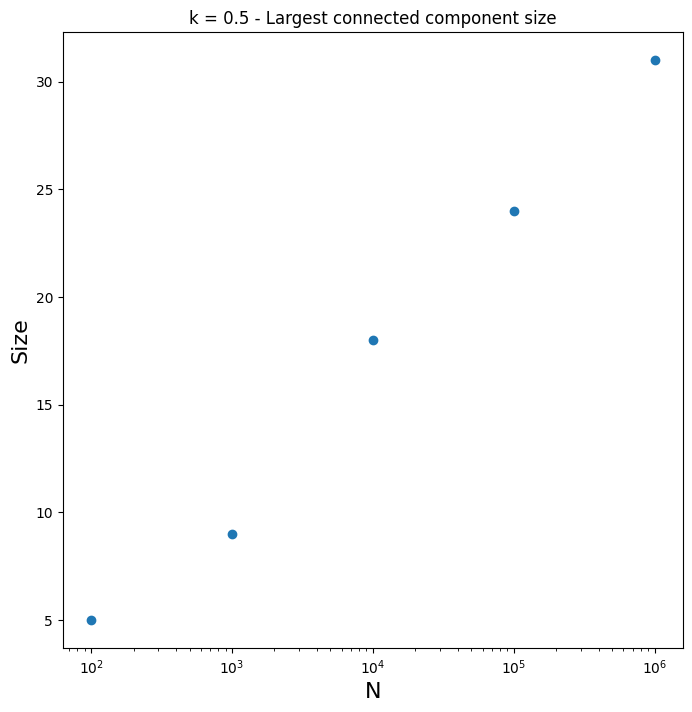

In [24]:
# Plot the largest component size as a function of N in semi-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the largest connected components
sizes = [len(largest_cc1), len(largest_cc2), len(largest_cc3), len(largest_cc4), len(largest_cc5)]

# each of these should get a different colour
plt.semilogx([10**2, 10**3, 10**4, 10**5, 10**6], sizes, 'o') # x is in log scale

plt.xlabel("N", fontsize=16) # Number of nodes
plt.ylabel("Size", fontsize=16)

plt.title("k = 0.5 - Largest connected component size")

plt.show()




In [25]:
# k = 1

G1 = nx.fast_gnp_random_graph(10**2, 1/(10**2 - 1))
G2 = nx.fast_gnp_random_graph(10**3, 1/(10**3 - 1))
G3 = nx.fast_gnp_random_graph(10**4, 1/(10**4 - 1))
G4 = nx.fast_gnp_random_graph(10**5, 1/(10**5 - 1))
G5 = nx.fast_gnp_random_graph(10**6, 1/(10**6 - 1))

G1 has 52 connected components.
G2 has 469 connected components.
G3 has 5026 connected components.
G4 has 49983 connected components.
G5 has 499689 connected components.


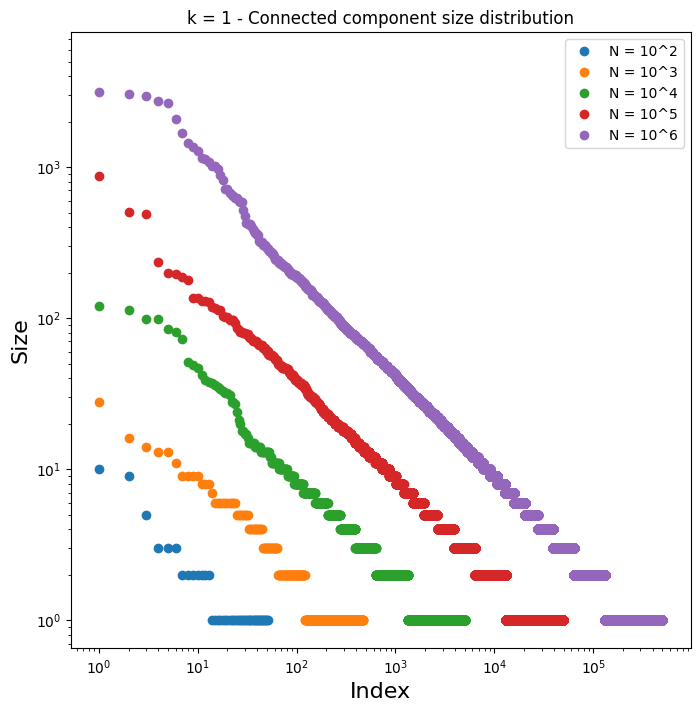

In [27]:
# Get the connected components of each network
cc1 = list(nx.connected_components(G1))
cc2 = list(nx.connected_components(G2))
cc3 = list(nx.connected_components(G3))
cc4 = list(nx.connected_components(G4))
cc5 = list(nx.connected_components(G5))

print("G1 has {0} connected components.".format(len(cc1)))
print("G2 has {0} connected components.".format(len(cc2)))
print("G3 has {0} connected components.".format(len(cc3)))
print("G4 has {0} connected components.".format(len(cc4)))
print("G5 has {0} connected components.".format(len(cc5)))
      
# Plot the distribution of the sizes in log-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the connected components
sizes1 = [len(cc) for cc in cc1]
sizes2 = [len(cc) for cc in cc2]
sizes3 = [len(cc) for cc in cc3]
sizes4 = [len(cc) for cc in cc4]
sizes5 = [len(cc) for cc in cc5]

# each of these should get a different colour
plt.loglog(sorted(sizes1, reverse=True), 'o', label='N = 10^2')
plt.loglog(sorted(sizes2, reverse=True), 'o', label='N = 10^3')
plt.loglog(sorted(sizes3, reverse=True), 'o', label='N = 10^4')
plt.loglog(sorted(sizes4, reverse=True), 'o', label='N = 10^5')
plt.loglog(sorted(sizes5, reverse=True), 'o', label='N = 10^6')

plt.xlabel("Index", fontsize=16) # Rank is index
plt.ylabel("Size", fontsize=16)

plt.legend()

plt.title("k = 1 - Connected component size distribution")

plt.show()





The largest connected component of G1 has 15 nodes.
The largest connected component of G2 has 168 nodes.
The largest connected component of G3 has 470 nodes.
The largest connected component of G4 has 5109 nodes.
The largest connected component of G5 has 3958 nodes.


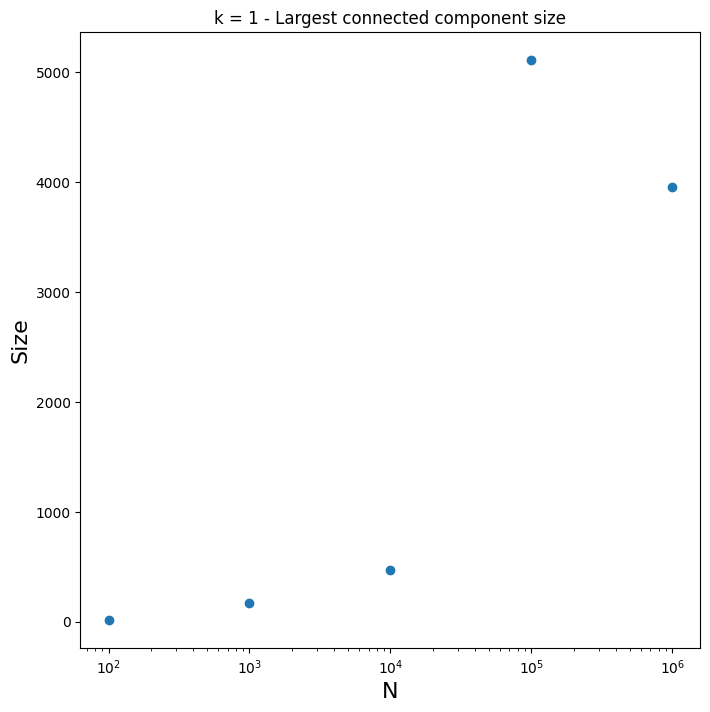

In [28]:
# Find the largest connected component
largest_cc1 = max(cc1, key=len)
largest_cc2 = max(cc2, key=len)
largest_cc3 = max(cc3, key=len)
largest_cc4 = max(cc4, key=len)
largest_cc5 = max(cc5, key=len)

print("The largest connected component of G1 has {0} nodes.".format(len(largest_cc1)))
print("The largest connected component of G2 has {0} nodes.".format(len(largest_cc2)))
print("The largest connected component of G3 has {0} nodes.".format(len(largest_cc3)))
print("The largest connected component of G4 has {0} nodes.".format(len(largest_cc4)))
print("The largest connected component of G5 has {0} nodes.".format(len(largest_cc5)))

# Plot the largest component size as a function of N in semi-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the largest connected components
sizes = [len(largest_cc1), len(largest_cc2), len(largest_cc3), len(largest_cc4), len(largest_cc5)]

plt.semilogx([10**2, 10**3, 10**4, 10**5, 10**6], sizes, 'o') # x is in log scale

plt.xlabel("N", fontsize=16) # Number of nodes
plt.ylabel("Size", fontsize=16)

plt.title("k = 1 - Largest connected component size")

plt.show()

None of these largest connected components can rise to the level of a "giant component" because a majority of nodes are not connected within the component (far from it).

[{0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 66, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 95, 96, 98, 99}, {4}, {11}, {16, 44}, {18}, {25}, {29}, {33}, {40}, {46}, {47}, {51}, {61}, {64}, {65}, {67}, {74}, {82}, {88}, {90}, {97}]
G1 has 21 connected components.
G2 has 144 connected components.
G3 has 1677 connected components.
G4 has 16261 connected components.
G5 has 162355 connected components.
[79, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


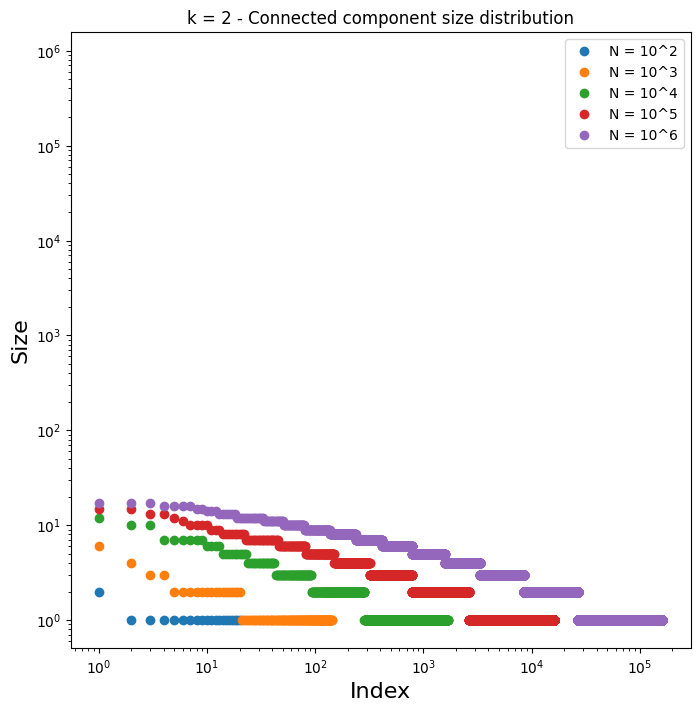

In [ ]:
# k = 2

G1 = nx.fast_gnp_random_graph(10**2, 2/(10**2 - 1))
G2 = nx.fast_gnp_random_graph(10**3, 2/(10**3 - 1))
G3 = nx.fast_gnp_random_graph(10**4, 2/(10**4 - 1))
G4 = nx.fast_gnp_random_graph(10**5, 2/(10**5 - 1))
G5 = nx.fast_gnp_random_graph(10**6, 2/(10**6 - 1))

# Get the connected components of each network
cc1 = list(nx.connected_components(G1))
cc2 = list(nx.connected_components(G2))
cc3 = list(nx.connected_components(G3))
cc4 = list(nx.connected_components(G4))
cc5 = list(nx.connected_components(G5))

print("G1 has {0} connected components.".format(len(cc1)))
print("G2 has {0} connected components.".format(len(cc2)))
print("G3 has {0} connected components.".format(len(cc3)))
print("G4 has {0} connected components.".format(len(cc4)))
print("G5 has {0} connected components.".format(len(cc5)))

# Plot the distribution of the sizes in log-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the connected components
sizes1 = [len(cc) for cc in cc1]
sizes2 = [len(cc) for cc in cc2]
sizes3 = [len(cc) for cc in cc3]
sizes4 = [len(cc) for cc in cc4]
sizes5 = [len(cc) for cc in cc5]

# each of these should get a different colour

plt.loglog(sorted(sizes1, reverse=True), 'o', label='N = 10^2')
plt.loglog(sorted(sizes2, reverse=True), 'o', label='N = 10^3')
plt.loglog(sorted(sizes3, reverse=True), 'o', label='N = 10^4')
plt.loglog(sorted(sizes4, reverse=True), 'o', label='N = 10^5')
plt.loglog(sorted(sizes5, reverse=True), 'o', label='N = 10^6')

plt.xlabel("Index", fontsize=16) # Rank is index
plt.ylabel("Size", fontsize=16)

plt.legend()

plt.title("k = 2 - Connected component size distribution")

plt.show()


The largest connected component of G1 has 80 nodes.
The largest connected component of G2 has 784 nodes.
The largest connected component of G3 has 7956 nodes.
The largest connected component of G4 has 79350 nodes.
The largest connected component of G5 has 797777 nodes.


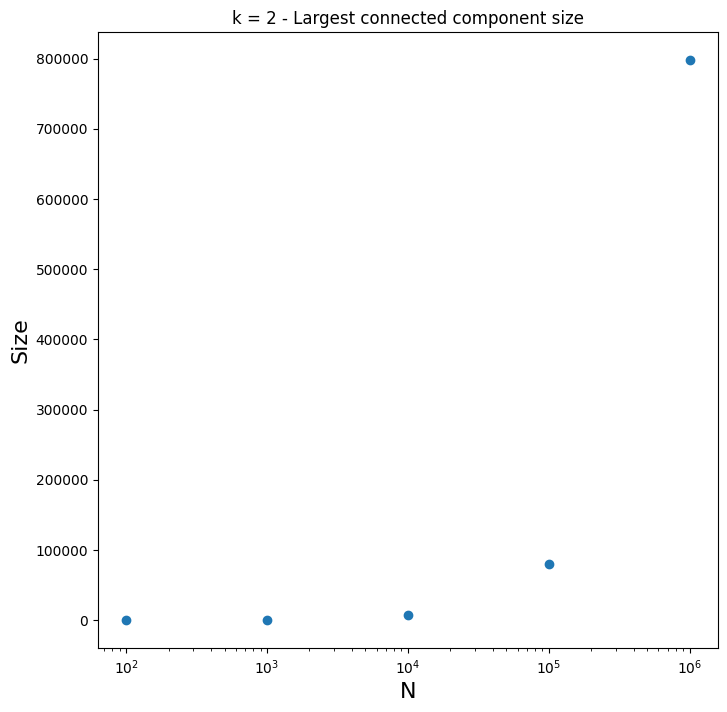

In [30]:
# Find the largest connected component

largest_cc1 = max(cc1, key=len)
largest_cc2 = max(cc2, key=len)
largest_cc3 = max(cc3, key=len)
largest_cc4 = max(cc4, key=len)
largest_cc5 = max(cc5, key=len)

print("The largest connected component of G1 has {0} nodes.".format(len(largest_cc1)))
print("The largest connected component of G2 has {0} nodes.".format(len(largest_cc2)))
print("The largest connected component of G3 has {0} nodes.".format(len(largest_cc3)))
print("The largest connected component of G4 has {0} nodes.".format(len(largest_cc4)))
print("The largest connected component of G5 has {0} nodes.".format(len(largest_cc5)))

# Plot the largest component size as a function of N in semi-log scale with different colours
fig = plt.figure(figsize=(8, 8))

# Get the sizes of the largest connected components
sizes = [len(largest_cc1), len(largest_cc2), len(largest_cc3), len(largest_cc4), len(largest_cc5)]

plt.semilogx([10**2, 10**3, 10**4, 10**5, 10**6], sizes, 'o') # x is in log scale

plt.xlabel("N", fontsize=16) # Number of nodes
plt.ylabel("Size", fontsize=16)

plt.title("k = 2 - Largest connected component size")

plt.show()


For k = 2, each node is connected to two other nodes on average, and every "largest" component can be classified as a "giant" component because it has a majority (more than half) of nodes connected

G1.size() = 100, and the largest component has 80 connected nodes -> giant component

G2.size() = 1000, and the largest component has 784 connected nodes -> giant component

G3.size() = 10000 and the largest component has 7956 connected nodes -> giant component

and so on...

Comparing my findings to expectations from the book

Consider p in cases of k = 0.5, 1, 2

k = 0.5 -> p is always 0.005 or smaller

Therefore, p is much smaller than 1/n. The random graphs remain in the subcritical regime which is consistent to the distribution of the size of the largest components (much smaller than a giant component).

k = 1 -> p is always 0.01 or smaller

Just barely meeting the threshold 1/n. We can say that the graph is in the critical regime. The size of the connected components are exponentially better than k = 0.5, but stil there is no giant component.

k = 2 -> p is always greater than 1/n

For example at n = 100, p = 0.02 > 1/100

This case is in the supercritical regime. Clearly, there is a giant component in each case, and its size exceeds the majority of the nodes in the graph.

Overall, the findings from the creation of random networks are consistent with the theories in the book. As the book mentioned, these networks are not so random after all.



# Don't reinvent the wheel

After you understand how some basic graph analysis algorithms work, you should never use them again and instead use the following off-the-shelf commands which are better written and faster.

## Graph generation

* ***`erdos_renyi_graph(n, p)`***   
Generate a random graph. More or less the same as we implemented above.
* ***`fast_gnp_random_graph(n, p)`***   
Much faster for sparse graphs

## Paths and path length
All of the below work on both `Graph` and `DiGraph` objects

* ***`has_path(G, source, dest)`***   
test to see if there is a path (of any length) in G from `source` to `dest`   
* ***`shortest_path(G, source, dest)`*** and ***`shortest_path_length(G, source, dest)`***   
former returns path as a sequence of nodes, latter only returns the length   
* ***`all_shortest_paths(G, source, dest)`***   
same as above, but gives ALL shortest paths   
* ***`single_source_shortest_path(G, source)`*** and ***`single_source_shortest_path_length(G, source)`***   
return dictionary `d` where `d[node]` is respectively, the shortest path/path length from `source` to `node`   
* ***`all_pairs_shortest_path(G)`*** and ***`all_pairs_shortest_path_length(G)`***   
return dictionary `d` where `d[node1][node2]` is as above   
* ***`dijkstra_path(G, source, dest)`*** and ***`dijkstra_path_length(G, source, dest)`***   
As above, but for weighted `Graph`/`DiGraph` objects   
* ***`single_source_dijkstra_path(G, source)`*** and ***`single_source_dijkstra_path_length(G, source)`***   
As above, but for weighted `Graph`/`DiGraph` objects  

## Searching
All of the below work on both `Graph` and `DiGraph` objects

* ***`bfs_tree(G, source)`***   
Return a Di/Graph representing the tree spanned by a breadth-first search starting at `source`   
* ***`dfs_tree(G, source)`***  
Same using depth-first search (gives same result)   
* ***`all_shortest_paths(G, source, dest)`***   
same as above, but gives ALL shortest paths   

## Connectedness (Undirected)
The below work only on `Graph` objects

* ***`is_connected(G)`***   
`True` or `False` depending on whether `G` is connected or not      
* ***`connected_components(G)`***     
Return a list of lists, where each sub-list contains the nodes in one component   
* ***`number_connected_components(G)`***      
Returns only the length of the list above   
* ***`connected_component_sugraphs(G)`***      
Returns a list of new `Graph` objects each representing a component of `G`   
* ***`node_connected_component(G, node)`***      
Return a list of the nodes in the component of `G` containing `node`   

## Connectedness (Strong and weak)
The commands below work only on `DiGraph` objects

Note: the `is_weakly_` versions are equivalent to first converting the DiGraph to undirected using G.undirected(), and then running the undirected equivalents above.
    
* ***`is_strongly_connected(G)`***   
* ***`strongly_connected_components(G)`***     
* ***`number_strongly_connected_components(G)`***      
* ***`strongly_connected_component_sugraphs(G)`***     


* ***`is_weakly_connected(G)`***   
* ***`weakly_connected_components(G)`***     
* ***`number_weakly_connected_components(G)`***      
* ***`weakly_connected_component_sugraphs(G)`***  

All are analogous to the undirected case   
  